 # ML Algorithms - LAB 2 : Student Grade Analysis

***
- `NAME:`  ***Tarun Kumar Punna***
- `       ID:` ***100801175***
***

 ***Task : Your manager has requested a deep data analysis regarding 2 data files. There are many features involved so it is necessary to create multiple
insights regarding all these data and correlations to better support the near-future task of the use of Regression models to forecast the final grade of a
student (G3). It was required that you spend time building up a “book report analysis” that can illustrate data relationships using tables, charts and
simple descriptions of your insights that will be used as an important data asset for machine learning design.***

### Import the relevant libraries

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

### Load the Datasets

In [2]:
math = pd.read_csv(r'student-mat.csv')
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
por = pd.read_csv(r'student-por.csv')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
print('Total number of students:',len(math))

Total number of students: 395


In [8]:
print('Total number of students:',len(por))

Total number of students: 649


In [12]:
math['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [13]:
por['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

 > ### Compare the two schools GP & MS with the score G3 for both subjects

In [15]:
sc_gp = math[math['school']=='GP']['G3'].value_counts()
sc_ms = math[math['school']=='MS']['G3'].value_counts()
sc_df = pd.DataFrame([sc_gp, sc_ms], index=['School GP', 'School MS'])
sc_df = sc_df.T

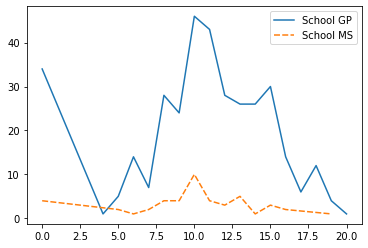

In [16]:
sns.lineplot(data=sc_df)

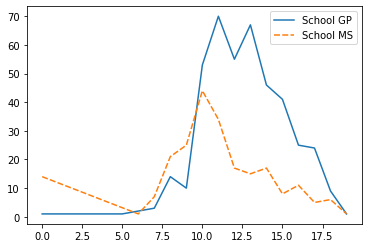

In [20]:
sc_gp = por[por['school']=='GP']['G3'].value_counts()
sc_ms = por[por['school']=='MS']['G3'].value_counts()
sc_df = pd.DataFrame([sc_gp, sc_ms], index=['School GP', 'School MS'])
sc_df = sc_df.T
sns.lineplot(data=sc_df)

 > ### Gender of Students in Math Subject

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

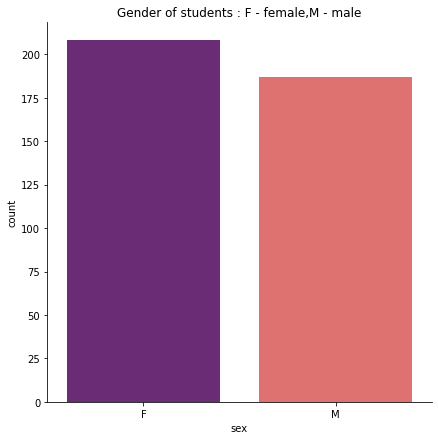

In [65]:
sns.catplot(x="sex", kind="count",palette="magma", data=math, height = 6)
plt.title("Gender of students : F - female,M - male")

 > ### Gender of Students in Portuguese Subject 

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

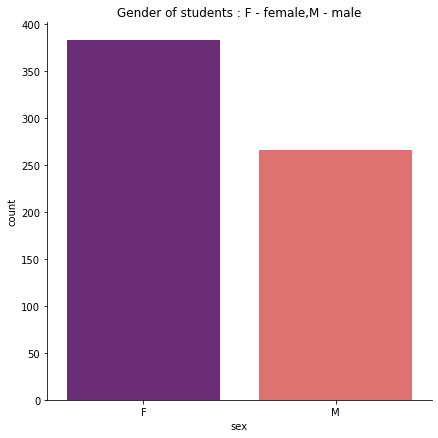

In [64]:
sns.catplot(x="sex", kind="count",palette="magma", data=por, height = 6)
plt.title("Gender of students : F - female,M - male")

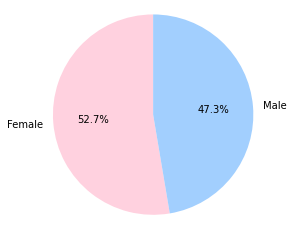

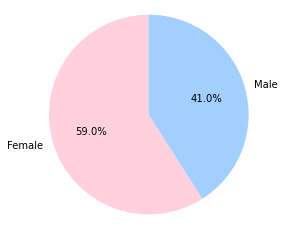

In [29]:

f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')


f, ax = plt.subplots(figsize=(4, 4))
plt.pie(por['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

 > ### Number of students who scored a particular grade in Math

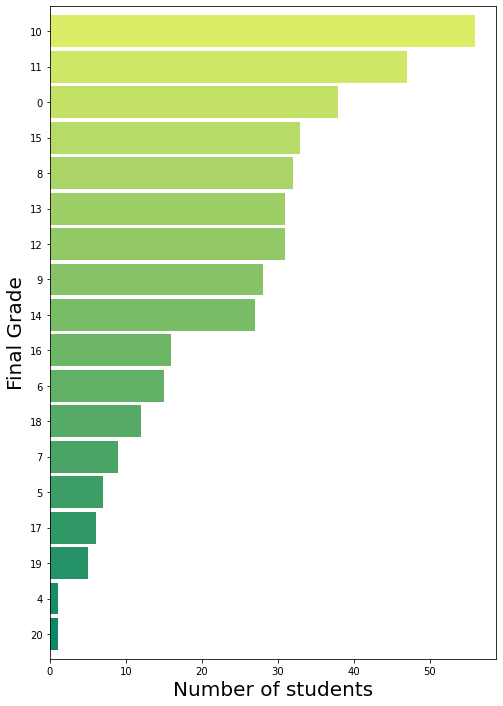

In [39]:
plt.subplots(figsize=(8,12))
grade_counts = math['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('summer',20))
#grade_counts.axes.set_title('Number of students who scored a particular grade in Math',fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=20)
grade_counts.set_ylabel('Final Grade', fontsize=20)
plt.show()

 > ### Number of students who scored a particular grade in Portuguese

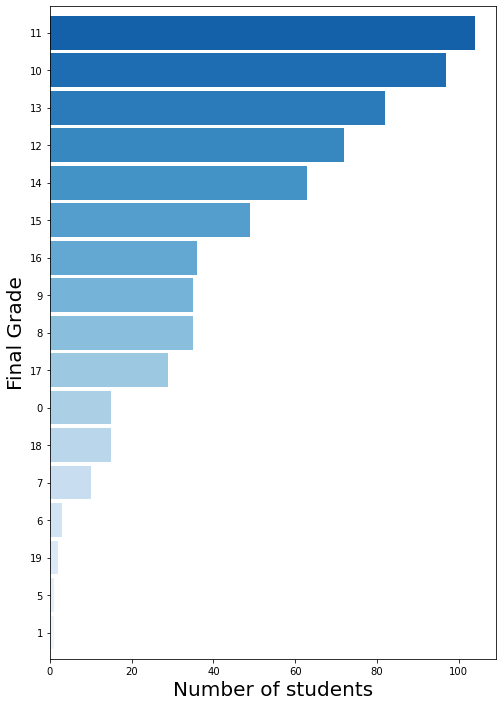

In [38]:
plt.subplots(figsize=(8,12))
grade_counts = por['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('Blues',20))
#grade_counts.axes.set_title('Number of students who scored a particular grade in Portuguese',fontsize=20)
grade_counts.set_xlabel('Number of students', fontsize=20)
grade_counts.set_ylabel('Final Grade', fontsize=20)
plt.show()

 > ### Study Times - Math

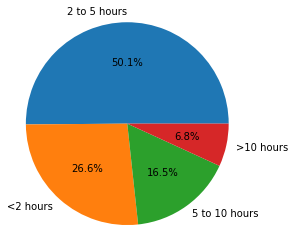

In [40]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

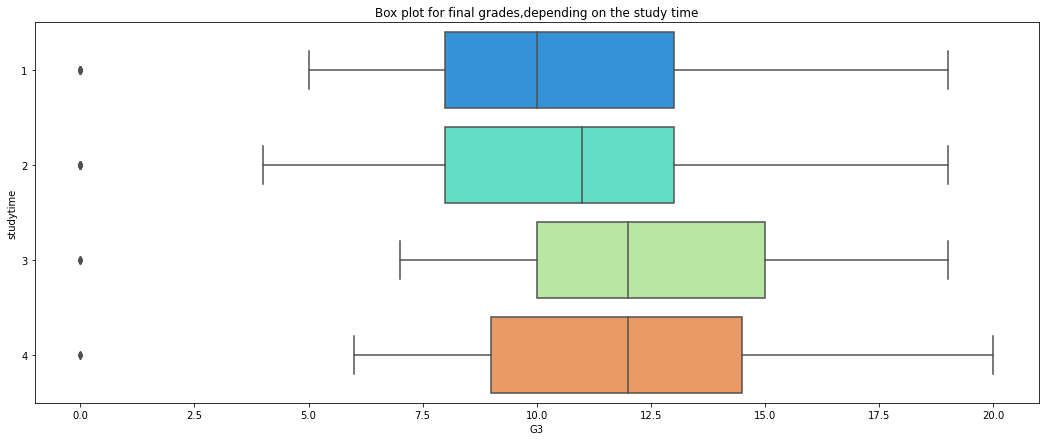

In [47]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="studytime", x="G3", data = math , orient="h", palette = 'rainbow')

 > ### Study Times - Portuguese

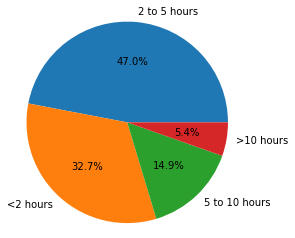

In [42]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(por['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

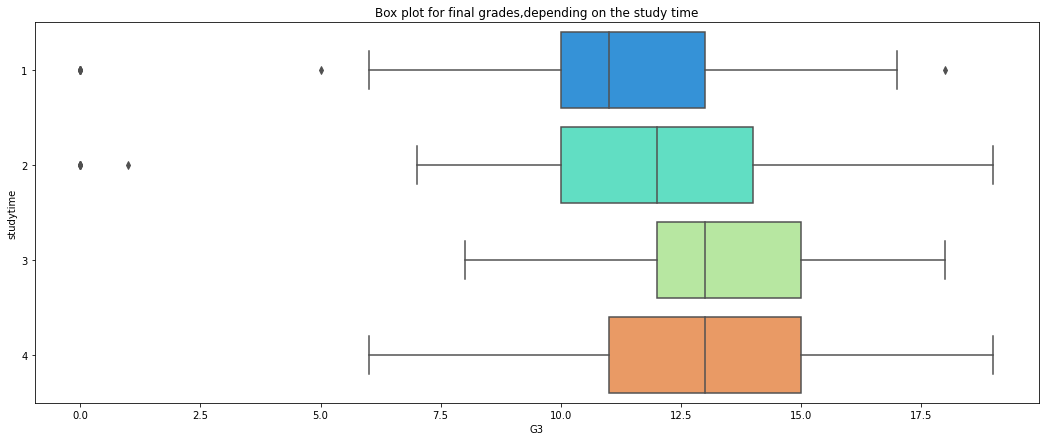

In [48]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="studytime", x="G3", data = por , orient="h", palette = 'rainbow')

 > ### Students traveltime from urban and rural areas

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

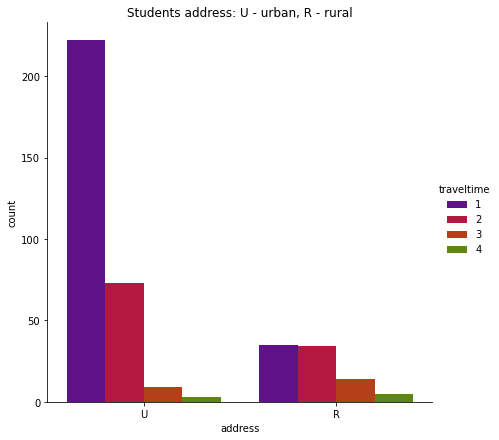

In [49]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=math, height = 6)
plt.title("Students address: U - urban, R - rural")

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

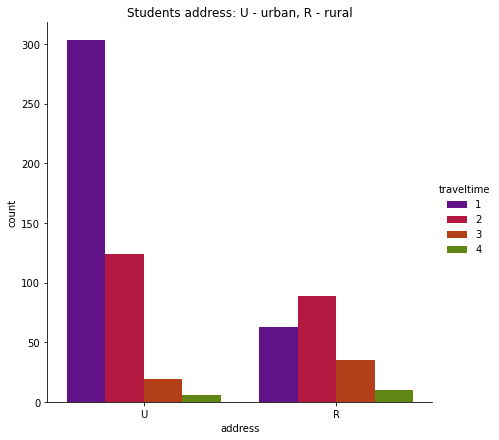

In [50]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=por, height = 6)
plt.title("Students address: U - urban, R - rural")

 > ### Do urban students score higher than rural students?

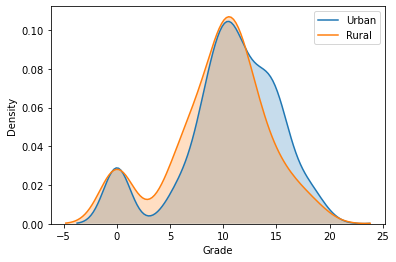

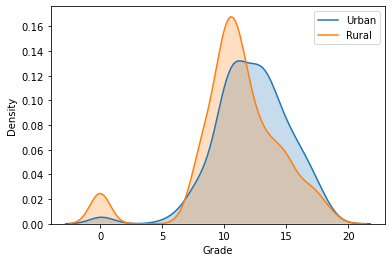

In [63]:
sns.kdeplot(math.loc[math['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(math.loc[math['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.xlabel('Grade', fontsize = 10);
plt.ylabel('Density', fontsize = 10)
plt.show()

sns.kdeplot(por.loc[por['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(por.loc[por['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.xlabel('Grade', fontsize = 10);
plt.ylabel('Density', fontsize = 10)
plt.show()

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

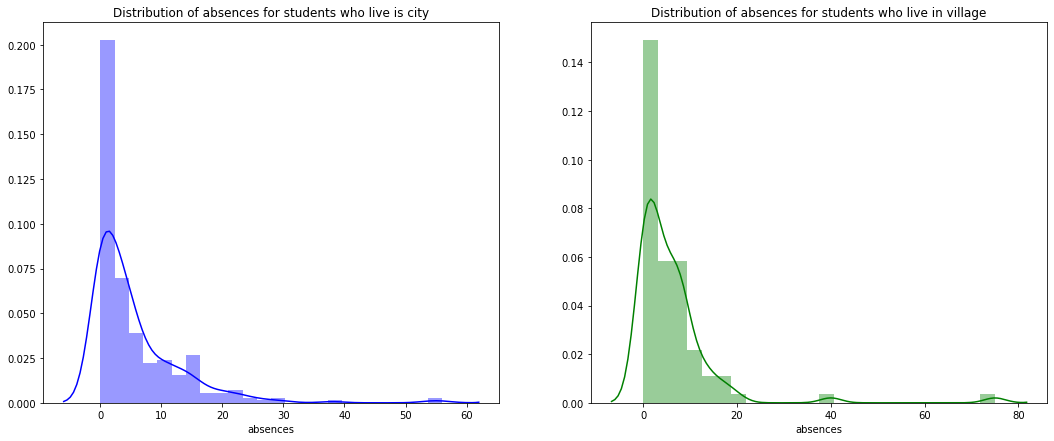

In [70]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(math[(math.address == 'U')]["absences"],color='Blue',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(math[(math.address == 'R')]['absences'],color='Green',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

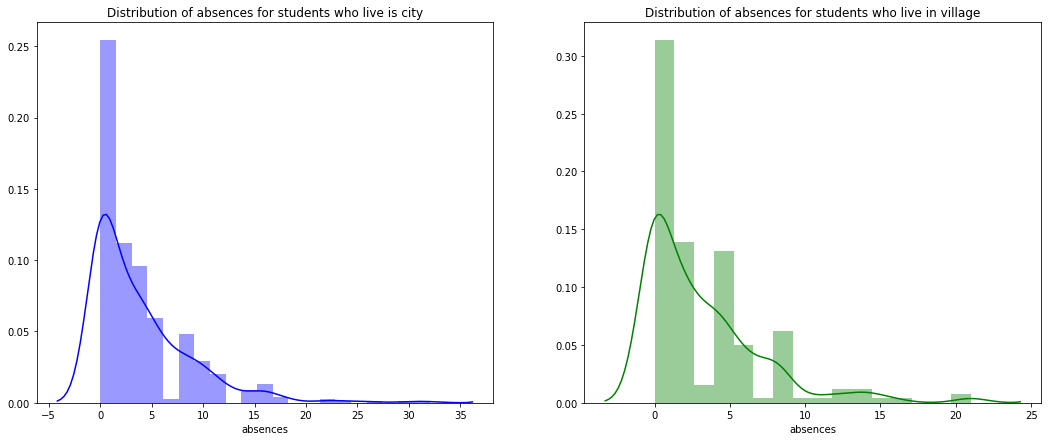

In [71]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(por[(por.address == 'U')]["absences"],color='Blue',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(por[(por.address == 'R')]['absences'],color='Green',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

 > ### Student Absentences based on where they live

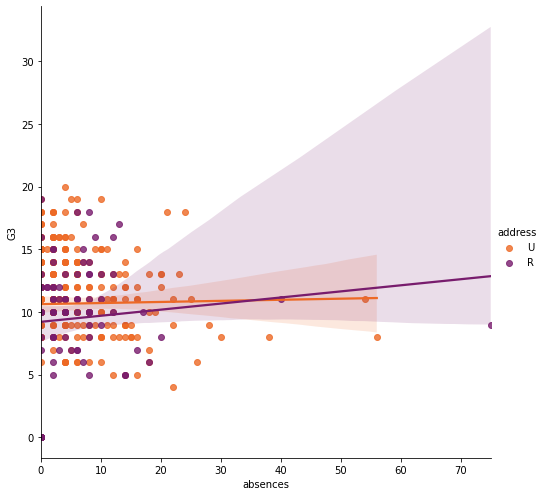

In [72]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=math, palette = 'inferno_r', size = 7)

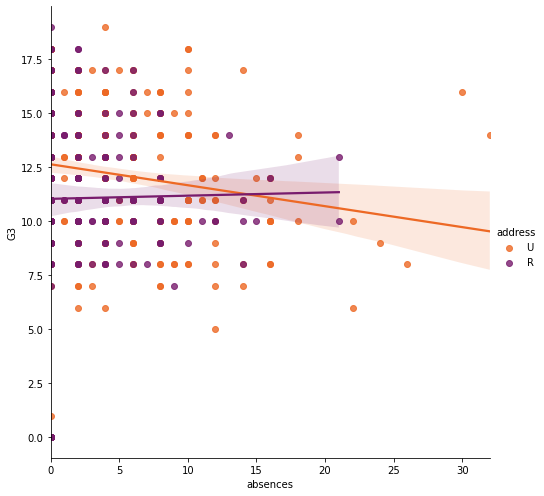

In [73]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=por, palette = 'inferno_r', size = 7)

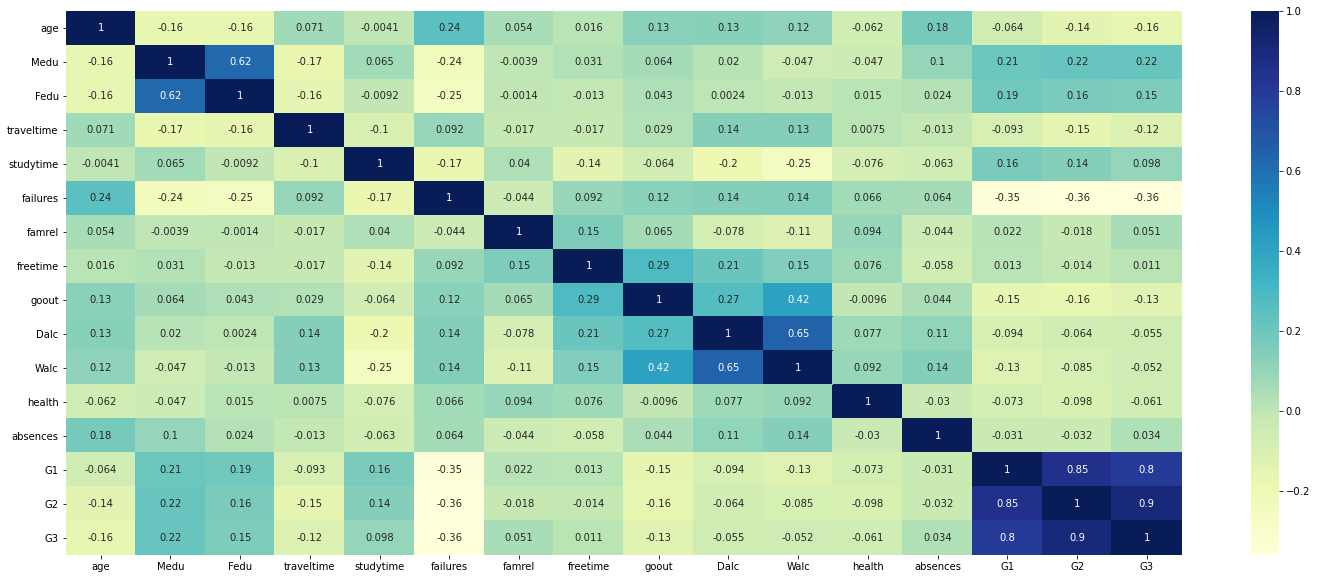

In [74]:
plt.figure(figsize=(25, 10))
sns.heatmap(math.corr(), annot=True, cmap='YlGnBu')

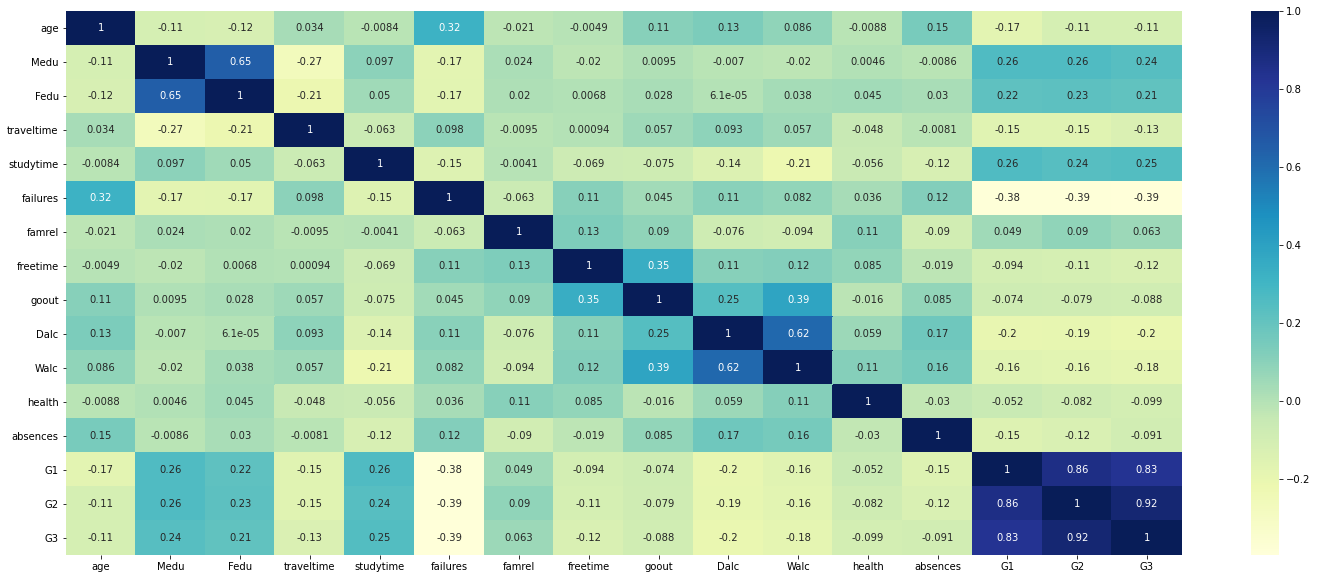

In [75]:
plt.figure(figsize=(25, 10))
sns.heatmap(por.corr(), annot=True, cmap='YlGnBu')

 > ### Educated families result in higher grades

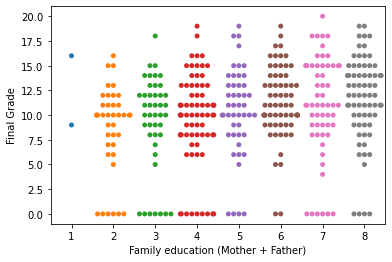

In [78]:
family_ed = math['Fedu'] + math['Medu'] 
b = sns.swarmplot(x=family_ed,y=math['G3'])
b.set_xlabel('Family education (Mother + Father)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

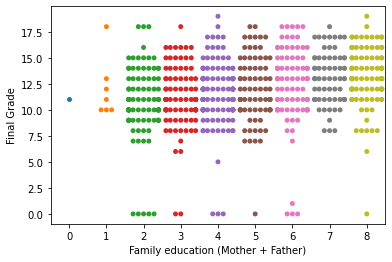

In [79]:
family_ed = por['Fedu'] + por['Medu'] 
b = sns.swarmplot(x=family_ed,y=por['G3'])
b.set_xlabel('Family education (Mother + Father)', fontsize = 10)
b.set_ylabel('Final Grade', fontsize = 10)
plt.show()

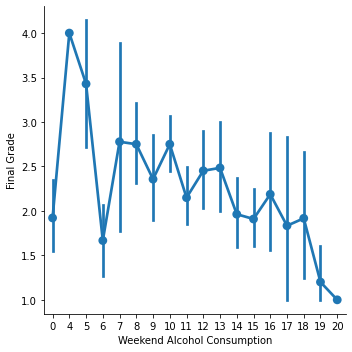

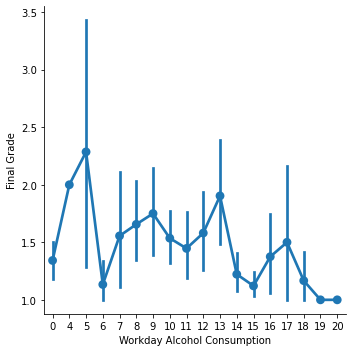

In [80]:
plot1 = sns.factorplot(x="G3", y="Walc", data=math)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="G3", y="Dalc", data=math)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

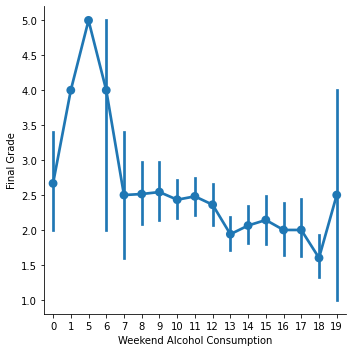

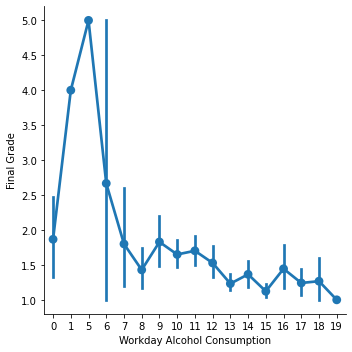

In [81]:
plot1 = sns.factorplot(x="G3", y="Walc", data=por)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="G3", y="Dalc", data=por)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

# > ### Alcholol Consumption and Health

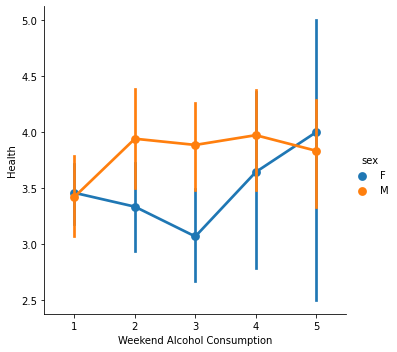

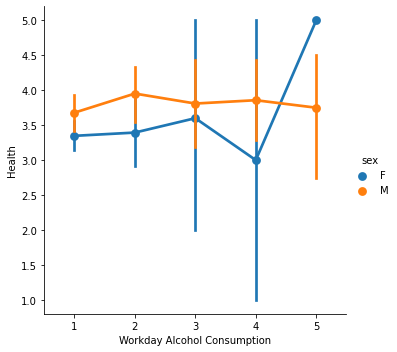

In [82]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=math)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=math)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

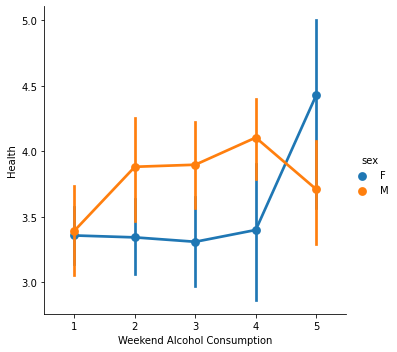

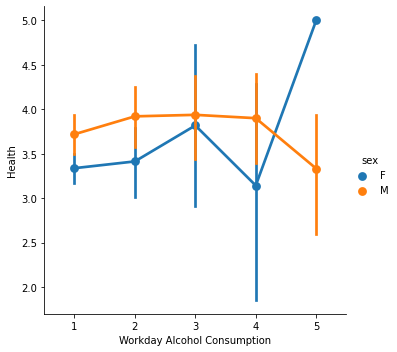

In [83]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=por)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=por)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")